In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load in data
DATA_PATH = Path("data") / "SRP120552.tsv"
df = pd.read_csv(DATA_PATH, sep="\t")
df = df.set_index("Gene")

df

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,56.629600,210.765150,0.000000,15.582642,0.000000,3.951188,1.013635,10.157310,12.500870,1.535458,...,143.910830,122.749306,0.000000,122.250435,94.166710,147.495970,0.000000,369.399140,0.000000,2.995046
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,52.532257,181.474520,250.384250,61.192110,0.854224,29.988983,32.392227,43.866116,34.768540,10.885117,...,0.000000,117.458120,0.000000,9.408690,56.129097,112.473976,7.008246,0.000000,248.942280,0.000000
ENSG00000000457,6.420248,9.038753,6.449249,0.896064,9.391796,1.694619,1.771045,0.890477,15.431188,6.612335,...,0.756136,0.789532,2.880358,3.794541,3.027338,0.790558,3.477984,2.319273,2.393112,236.096450
ENSG00000000460,0.000000,27.647682,0.000000,140.431730,0.000000,15.594472,10.486232,1.409931,43.129833,3.073701,...,0.000000,0.000000,0.000000,0.000000,3.229686,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286268,0.000000,0.000000,0.000000,0.000000,0.000000,2.140921,0.000000,0.000000,0.000000,1.921149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286269,3.012283,6.357253,0.000000,2.920779,12.417953,2.216796,3.025142,2.377553,2.266806,0.000000,...,1.006215,0.000000,0.835804,1.811789,4.883857,1.861232,6.817812,0.000000,0.000000,0.000000
ENSG00000286270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# Sort data to get top 5000 most variable genes
gene_variability = df.T.var(axis=0)
top_5000_indices = gene_variability.sort_values(ascending=False).head(5000).index
top_5000 = df.loc[top_5000_indices]

top_5000

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000210082,5599.750000,7230.140000,735357.440000,7469.360000,8766.538000,21430.752000,4058.474000,7557.278300,2793.431200,7111.938000,...,11465.611000,9888.944000,15644.154000,12655.970000,10016.802000,19831.766000,18816.709000,8673.412000,15588.810000,26950.832000
ENSG00000198804,4601.987300,7942.763700,391568.720000,9359.391000,85.343575,15969.971000,5007.246600,6474.729500,2219.409000,18382.117000,...,6155.149000,3330.031200,10697.963000,8370.051000,4245.984400,4976.292500,9354.555000,2280.387200,2159.225600,12917.124000
ENSG00000198712,4125.296400,10058.292000,352864.000000,5511.187500,7439.168000,12321.420000,2858.999000,4128.221700,3296.330000,8210.033000,...,8982.472000,7998.817400,12161.105000,5640.481000,7556.910000,13185.232000,13853.082000,5620.254000,9419.205000,19412.781000
ENSG00000198727,2734.201400,6546.200700,387255.400000,3957.722200,56.533360,7474.785600,1651.317300,2853.277800,2421.224900,7816.785000,...,3121.184800,6170.355000,4410.043500,2201.462000,4224.937000,8407.100000,6059.807600,1360.717500,6166.484400,5891.238000
ENSG00000198886,1673.385400,4487.421000,225261.050000,3340.211200,20.481420,4489.030000,1985.255100,2374.972200,1719.037500,3426.516600,...,2441.369900,5099.869600,3248.778000,3038.138000,3477.907500,6141.428700,5923.356400,2601.986300,5105.626500,4846.794400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000084733,15.421330,262.426970,0.000000,27.020786,0.000000,129.898960,42.562950,17.570818,46.036050,16.854181,...,0.517226,68.886090,0.000000,0.000000,208.399930,39.218490,0.000000,0.000000,249.126790,8.948737
ENSG00000051620,11.990015,99.676315,14.618929,1.286581,0.000000,23.217503,0.000000,82.760660,0.000000,0.000000,...,36.561820,71.034620,84.136740,0.000000,0.000000,2.148382,27.013287,0.000000,0.815208,0.000000
ENSG00000167693,0.686648,228.725770,7.209654,4.311105,0.000000,54.070942,11.752263,6.790919,18.381227,14.180720,...,0.000000,9.173718,261.846700,119.232860,0.000000,2.361594,0.000000,0.000000,0.000000,18.095724


In [4]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_5000.T)

cluster_labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1,

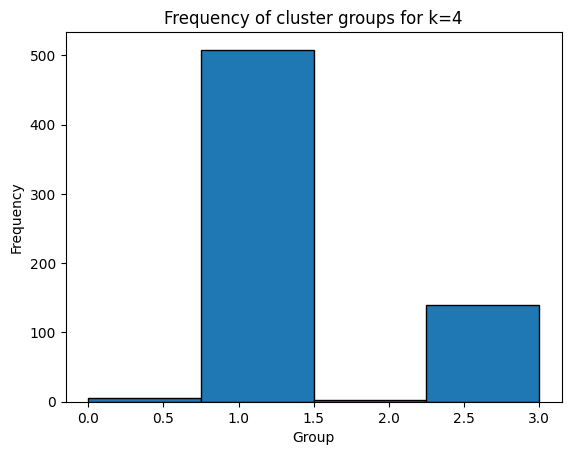

In [5]:
# Show distribution of groups for k=4
plt.hist(cluster_labels, bins=4, edgecolor='black')
plt.title('Frequency of cluster groups for k=4')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

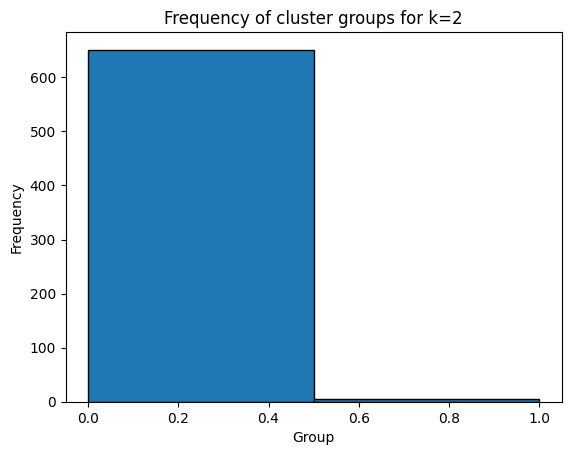

In [6]:
# Show clustering for k = 2
k = 2
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_5000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

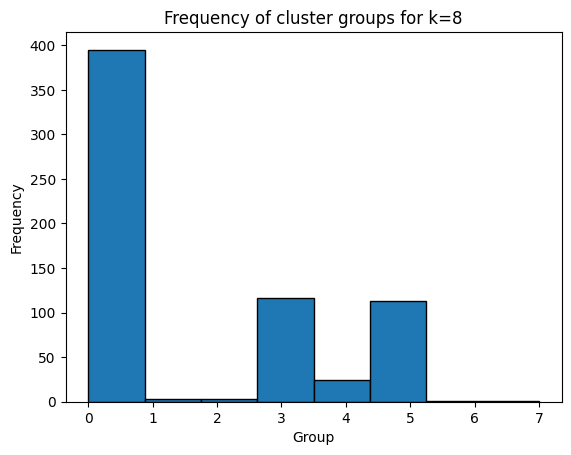

In [7]:
# Show clustering for k = 8
k = 8
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_5000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

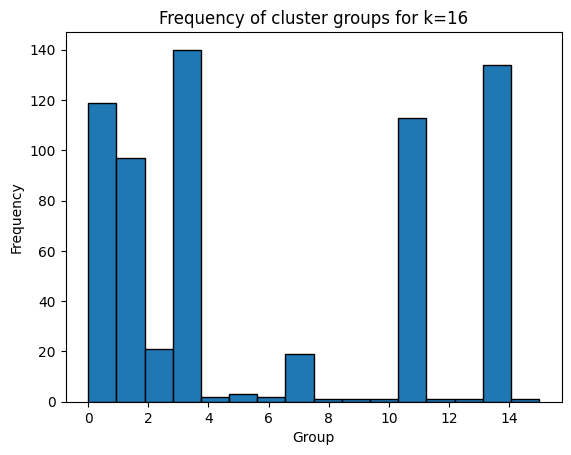

In [8]:
# Show clustering for k = 16
k = 16
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_5000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

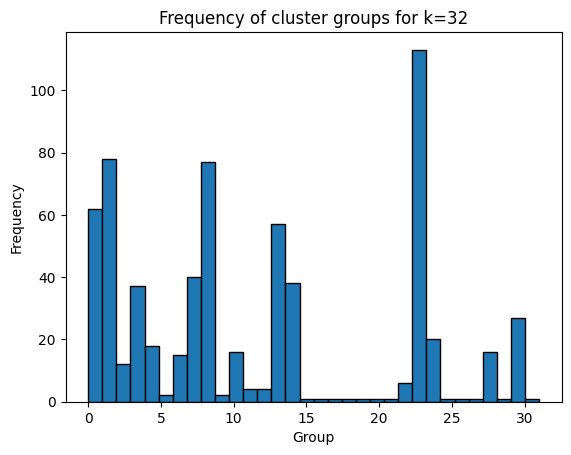

In [9]:
# Show clustering for k = 32
k = 32
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_5000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Get different gene pools
sorted_genes =  gene_variability.sort_values(ascending=False)

top_10000_indices = sorted_genes.head(10000).index
top_10000 = df.loc[top_10000_indices]

top_1000_indices = sorted_genes.head(1000).index
top_1000 = df.loc[top_1000_indices]

top_100_indices = sorted_genes.head(100).index
top_100 = df.loc[top_100_indices]

top_10_indices = sorted_genes.head(10).index
top_10 = df.loc[top_10_indices]

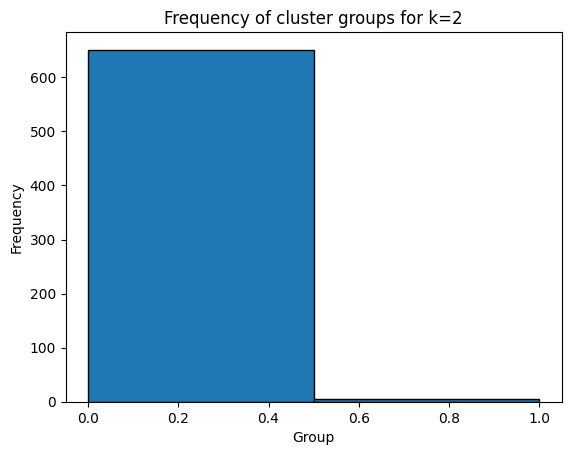

In [11]:
# Cluster for k= 2, 4, 8, 16, 32 with g=10000
k = 2
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

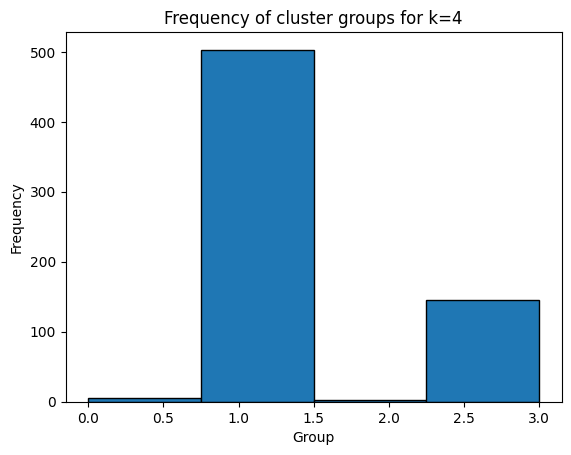

In [12]:
k = 4
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

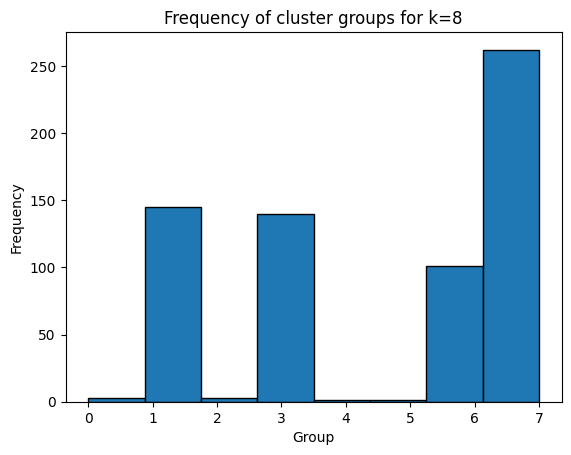

In [13]:
k = 8
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

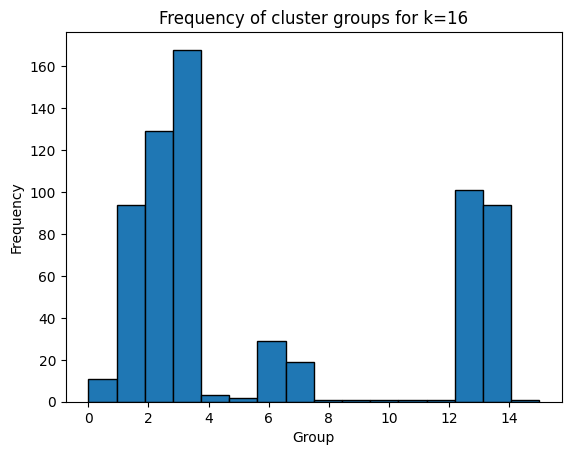

In [14]:
k = 16
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

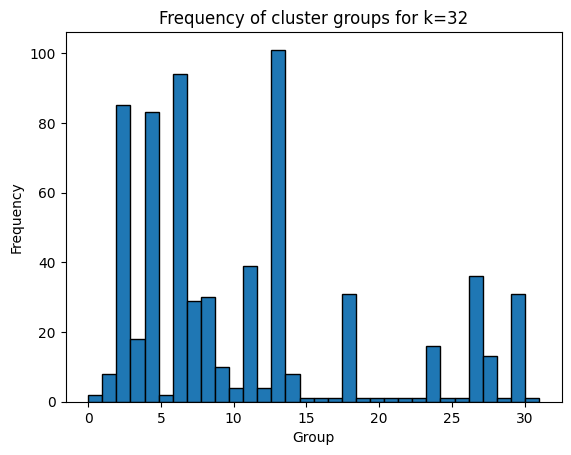

In [15]:
k = 32
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

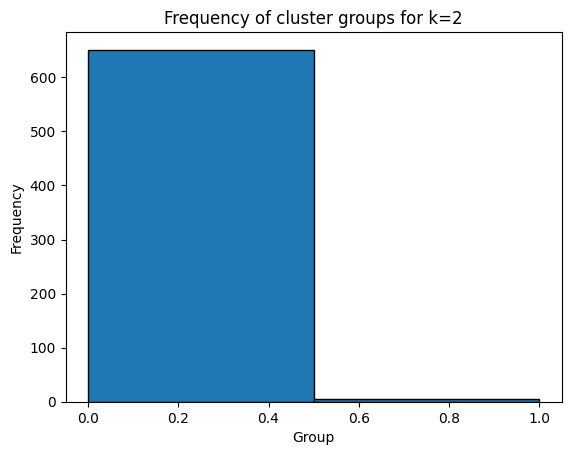

In [16]:
# Cluster for k= 2, 4, 8, 16, 32 with g=1000
k = 2
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_1000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

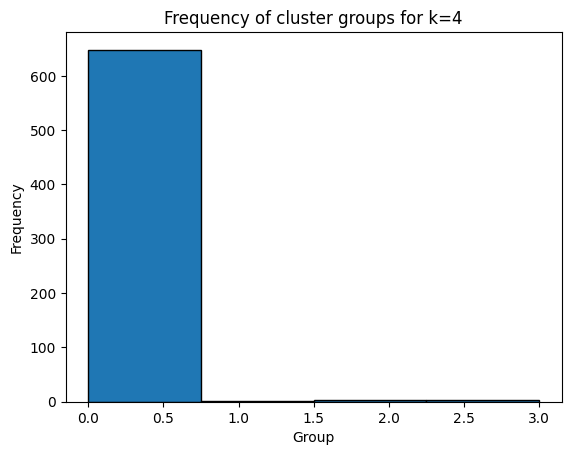

In [17]:
k = 4
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_1000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

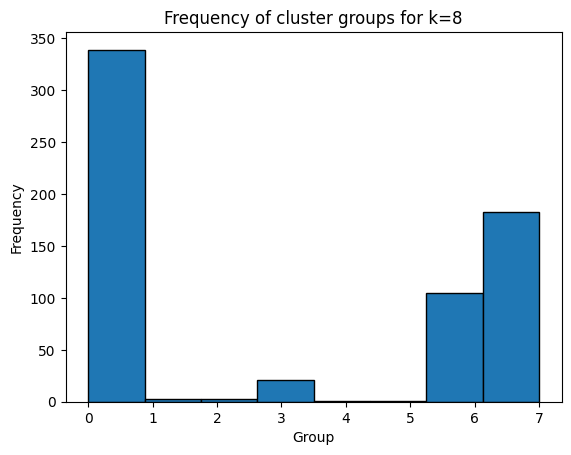

In [18]:
k = 8
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_1000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

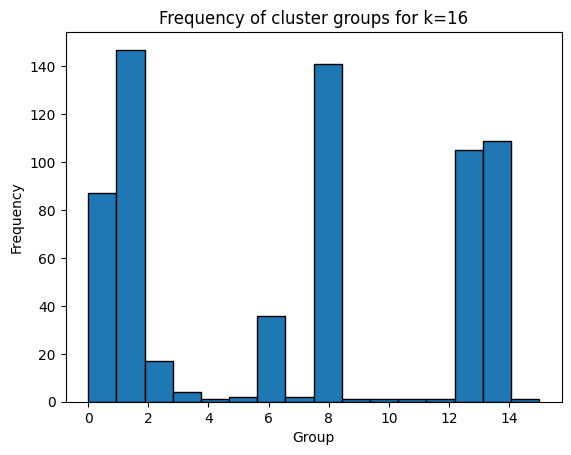

In [19]:
k = 16
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_1000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

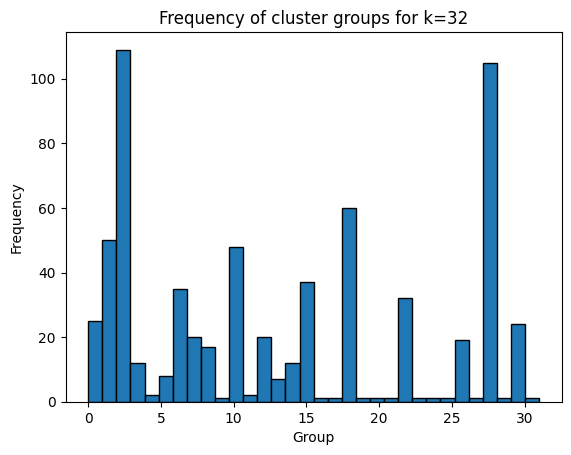

In [20]:
k = 32
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_1000.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

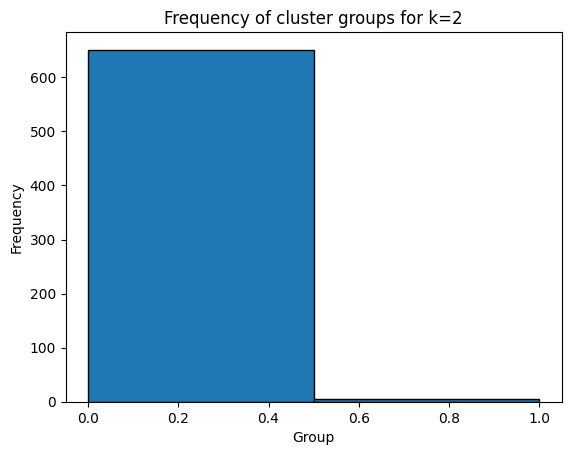

In [21]:
# Cluster for k= 2, 4, 8, 16, 32 with g=100
k = 2
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_100.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

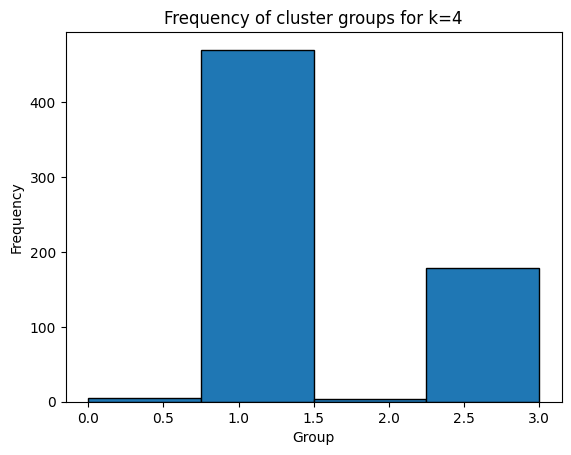

In [22]:
k = 4
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_100.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

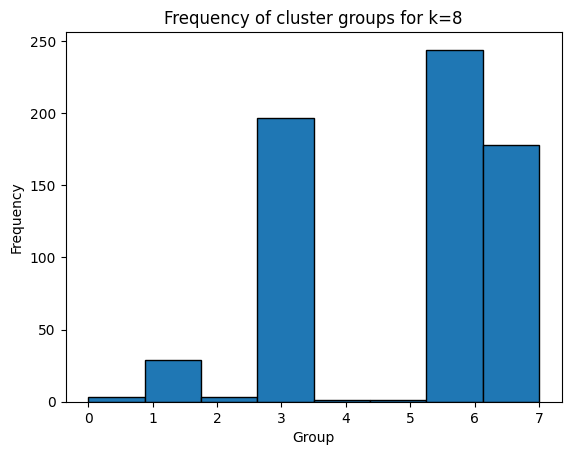

In [23]:
k = 8
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_100.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

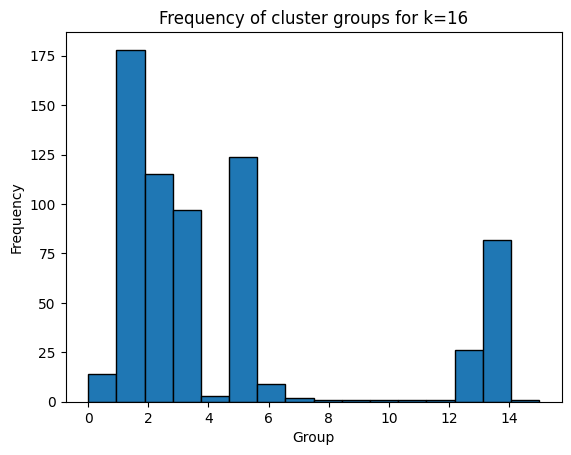

In [24]:
k = 16
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_100.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

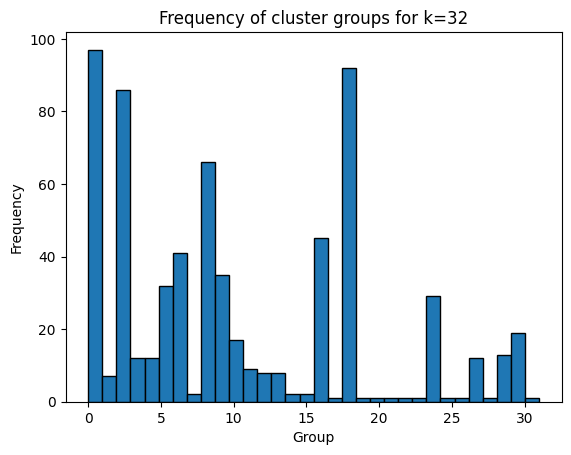

In [25]:
k = 32
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_100.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

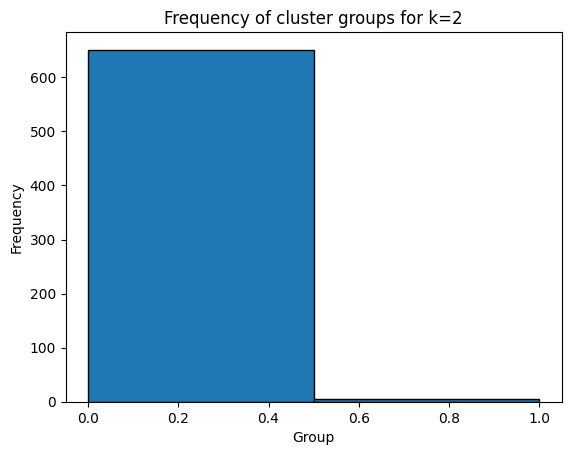

In [26]:
# Cluster for k= 2, 4, 8, 16, 32 with g=10
k = 2
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

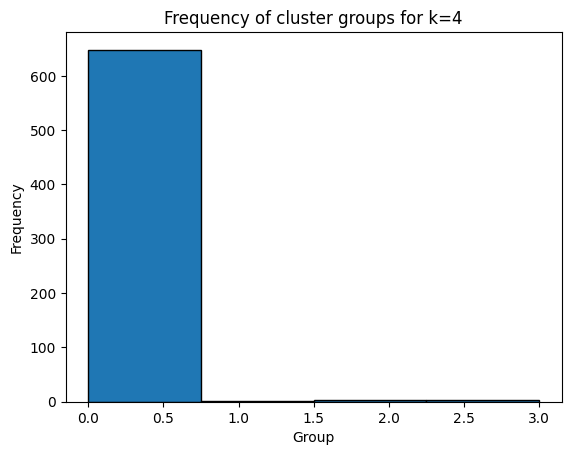

In [27]:
k = 4
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

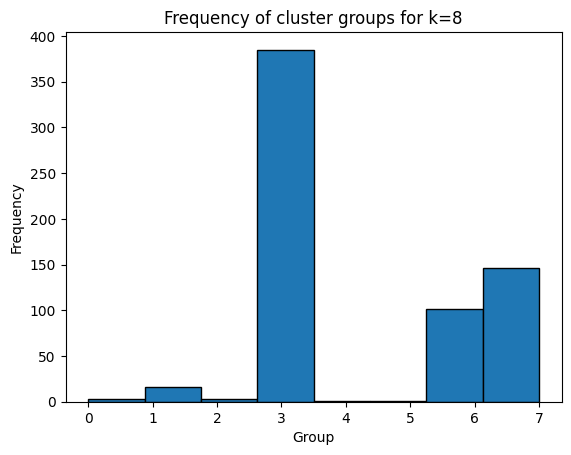

In [28]:
k = 8
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

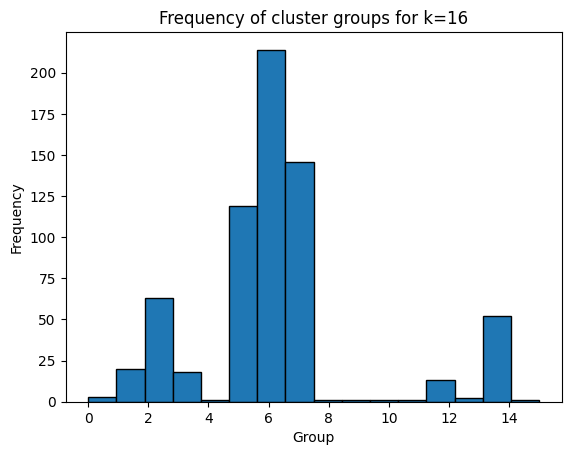

In [29]:
k = 16
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

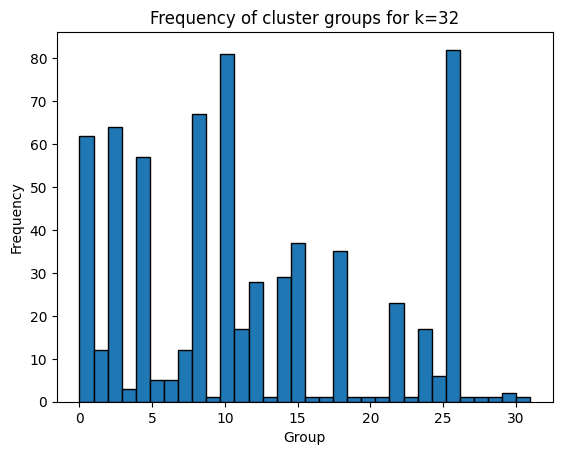

In [30]:
k = 32
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agg_clustering.fit_predict(top_10.T)
plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.title(f'Frequency of cluster groups for k={k}')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Chi squared analysis

from actual_labels import get_actual_labels
from hclust import hclust

k = 8

clusters = [
    ("10000", hclust(top_10000.T, k)),
    ("5000",hclust(top_5000.T, k)),
    ("1000",hclust(top_1000.T, k)),
    ("100",hclust(top_100.T, k)),
    ("10",hclust(top_10.T, k)),
    ("Original",get_actual_labels()),
]

clusters


[('Top 10000',
  array([7, 3, 0, 7, 7, 3, 7, 7, 7, 3, 3, 7, 2, 3, 6, 2, 7, 7, 3, 7, 7, 6,
         7, 7, 1, 6, 7, 7, 7, 3, 6, 7, 7, 3, 7, 3, 3, 3, 7, 7, 7, 6, 7, 3,
         3, 7, 7, 5, 7, 7, 7, 7, 1, 3, 3, 7, 1, 1, 7, 3, 7, 7, 7, 1, 7, 3,
         3, 7, 7, 3, 7, 6, 3, 1, 3, 1, 7, 3, 3, 3, 3, 3, 7, 7, 3, 3, 6, 1,
         7, 6, 3, 7, 7, 3, 3, 7, 3, 3, 7, 3, 6, 3, 7, 6, 6, 3, 6, 3, 7, 7,
         3, 6, 6, 6, 3, 6, 3, 3, 3, 3, 7, 7, 3, 7, 6, 3, 7, 6, 6, 6, 7, 3,
         3, 3, 3, 6, 3, 3, 7, 6, 6, 3, 3, 3, 3, 3, 3, 6, 3, 3, 6, 6, 0, 6,
         3, 3, 6, 3, 6, 3, 3, 6, 6, 3, 6, 3, 3, 3, 3, 7, 3, 7, 3, 3, 6, 3,
         7, 3, 3, 3, 6, 4, 6, 0, 3, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 1,
         1, 7, 6, 7, 7, 6, 1, 7, 7, 7, 7, 7, 6, 7, 3, 7, 1, 7, 3, 7, 7, 7,
         1, 1, 7, 7, 7, 6, 7, 1, 7, 6, 3, 6, 7, 7, 7, 7, 3, 7, 1, 1, 1, 3,
         1, 6, 7, 7, 7, 7, 7, 7, 1, 1, 1, 7, 1, 1, 7, 7, 7, 1, 1, 7, 7, 1,
         1

In [40]:
from itertools import combinations

pairs = list(combinations(clusters, 2))

pairs

[(('Top 10000',
   array([7, 3, 0, 7, 7, 3, 7, 7, 7, 3, 3, 7, 2, 3, 6, 2, 7, 7, 3, 7, 7, 6,
          7, 7, 1, 6, 7, 7, 7, 3, 6, 7, 7, 3, 7, 3, 3, 3, 7, 7, 7, 6, 7, 3,
          3, 7, 7, 5, 7, 7, 7, 7, 1, 3, 3, 7, 1, 1, 7, 3, 7, 7, 7, 1, 7, 3,
          3, 7, 7, 3, 7, 6, 3, 1, 3, 1, 7, 3, 3, 3, 3, 3, 7, 7, 3, 3, 6, 1,
          7, 6, 3, 7, 7, 3, 3, 7, 3, 3, 7, 3, 6, 3, 7, 6, 6, 3, 6, 3, 7, 7,
          3, 6, 6, 6, 3, 6, 3, 3, 3, 3, 7, 7, 3, 7, 6, 3, 7, 6, 6, 6, 7, 3,
          3, 3, 3, 6, 3, 3, 7, 6, 6, 3, 3, 3, 3, 3, 3, 6, 3, 3, 6, 6, 0, 6,
          3, 3, 6, 3, 6, 3, 3, 6, 6, 3, 6, 3, 3, 3, 3, 7, 3, 7, 3, 3, 6, 3,
          7, 3, 3, 3, 6, 4, 6, 0, 3, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
          7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 1,
          1, 7, 6, 7, 7, 6, 1, 7, 7, 7, 7, 7, 6, 7, 3, 7, 1, 7, 3, 7, 7, 7,
          1, 1, 7, 7, 7, 6, 7, 1, 7, 6, 3, 6, 7, 7, 7, 7, 3, 7, 1, 1, 1, 3,
          1, 6, 7, 7, 7, 7, 7, 7, 1, 1, 1, 7, 1, 1, 7, 7, 7, 1, 1, 7, 7,

In [43]:
from scipy.stats import chi2_contingency

results = []

for gA, gB in pairs:
        contingency = pd.crosstab(gA[1], gB[1])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({'Comparison': f'Top {gA[0]} vs Top {gB[0]}', 'Chi²': chi2, 'p-value': p, 'DOF': dof})

results_df = pd.DataFrame(results)

results_df

,Comparison,Chi²,p-value,DOF
0,Top Top 10000 vs Top Top 5000,3738.364588,0.000000e+00,49
1,Top Top 10000 vs Top Top 1000,3586.512657,0.000000e+00,49
2,Top Top 10000 vs Top Top 100,3346.316127,0.000000e+00,49
3,Top Top 10000 vs Top Top 10,3479.513155,0.000000e+00,49
4,Top Top 10000 vs Top Original,267.650262,1.148079e-44,21
5,Top Top 5000 vs Top Top 1000,3856.302343,0.000000e+00,49
6,Top Top 5000 vs Top Top 100,3488.880015,0.000000e+00,49
7,Top Top 5000 vs Top Top 10,3938.063760,0.000000e+00,49
8,Top Top 5000 vs Top Original,213.567349,7.602172e-34,21
9,Top Top 1000 vs Top Top 100,3832.508437,0.000000e+00,49
